# 군AI교육지원사업

## WEEK 2 - Regularization & Optimization

### Regularization

Regulairzation은 신경망을 비롯한 머신러닝 모델이 훈련 과정에서 생기는 과적합을 방지하기 위해 사용되는 기술입니다. 과적합이란 기계학습 모델이 학습 데이터에 대한 정확한 예측을 제공하지만 새 데이터에 대해서는 정확한 예측을 제공하지 못하는 것을 의미합니다. 즉, 학습 데이터에 대해 학습을 했기보다 암기를 했다고 볼 수 있습니다. 

이러한 현상을 방지하기 위해서 다양한 regularization 기법들이 제안되었습니다. 이러한 기술들은 대다수가 훈련할 때 모델의 가중치를 분석하고 수정하는 방식으로 동작합니다.





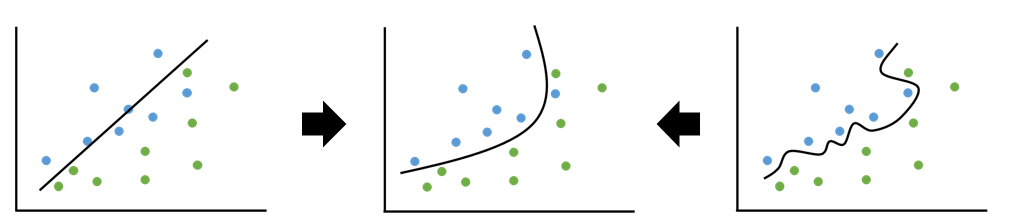

#### Data Description

본격적인 실습을 진행하기에 앞서서 금일 사용할 데이터에 대해서 설명드리도록 하겠습니다.

##### 데이터
데이터명: Boston Housing Price \\
데이터수: 506개 \\
변수: 14개 \\

 [01]  CRIM 	자치시(town) 별 1인당 범죄율 \\
 [02]  ZN 	25,000 평방피트를 초과하는 거주지역의 비율 \\
 [03]  INDUS 	비소매상업지역이 점유하고 있는 토지의 비율 \\
 [04]  CHAS 	찰스강에 대한 더미변수(강의 경계에 위치한 경우는 1, 아니면 0) \\
 [05]  NOX 	10ppm 당 농축 일산화질소 \\
 [06]  RM 	주택 1가구당 평균 방의 개수 \\
 [07]  AGE 	1940년 이전에 건축된 소유주택의 비율 \\
 [08]  DIS 	5개의 보스턴 직업센터까지의 접근성 지수 \\
 [09]  RAD 	방사형 도로까지의 접근성 지수 \\
 [10]  TAX 	10,000 달러 당 재산세율 \\
 [11]  PTRATIO 	자치시(town)별 학생/교사 비율 \\
 [12]  B 	1000(Bk-0.63)^2, 여기서 Bk는 자치시별 흑인의 비율을 말함. \\
 [13]  LSTAT 	모집단의 하위계층의 비율(%) \\
 [14]  MEDV 	본인 소유의 주택가격(중앙값) (단위: $1,000)

온라인에 있는 csv파일을 활용하여 데이터를 불러오도록 하겠습니다.

In [1]:
import numpy as np
import pandas as pd

url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv'
input_df = pd.read_csv(url,header=None)

In [2]:
input_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


Google Drive에 있는 데이터를 불러오는 것 또한 가능합니다.

In [3]:
data = input_df.values
print(data)

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 3.9690e+02 4.9800e+00 2.4000e+01]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 3.9690e+02 9.1400e+00 2.1600e+01]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 3.9283e+02 4.0300e+00 3.4700e+01]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 3.9690e+02 5.6400e+00 2.3900e+01]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 3.9345e+02 6.4800e+00 2.2000e+01]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 3.9690e+02 7.8800e+00 1.1900e+01]]


일부 데이터만 샘플링하여 시각화를 진행하도록 하겠습니다.

In [4]:
X = data[0:35, 12] # choose one feature
y = data[0:35, 13] # target

<AxesSubplot:>

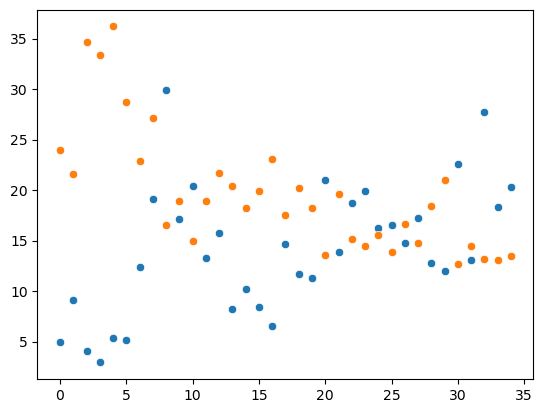

In [5]:
import seaborn as sns
sns.scatterplot(X)
sns.scatterplot(y)

#### Simple Linear Regression

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [7]:
lin_reg = LinearRegression()

In [8]:
# reshape
X_re = X[:, np.newaxis]
y_re = y[:, np.newaxis]

In [9]:
lin_reg.fit(X_re, y_re)

LinearRegression()

In [10]:
y_pred = lin_reg.predict(X_re)

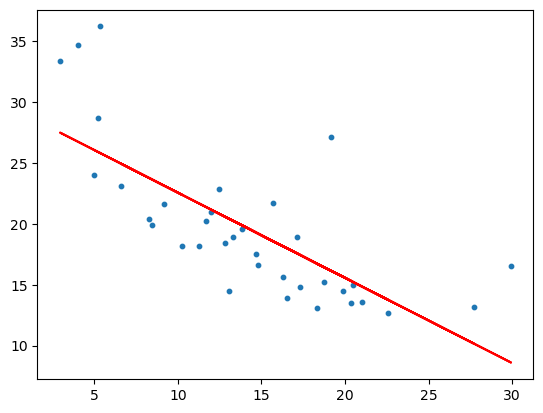

RMSE: 4.109901007971022
R2 score: 0.5397260819538162


In [11]:
# Plot fit over data
plt.scatter(X_re, y_re, s=10)
plt.plot(X_re, y_pred, color='r')
plt.show()

# Model accuracy
rmse = np.sqrt(mean_squared_error(y,y_pred))
r2 = r2_score(y,y_pred)
print("RMSE: " + str(rmse))
print("R2 score: " + str(r2))

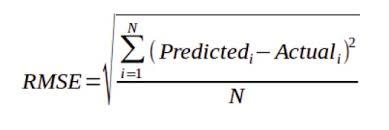

평균 제곱근 편차(Root Mean Square Deviation; RMSD) 또는 평균 제곱근 오차(Root Mean Square Error; RMSE)는 추정 값 또는 모델이 예측한 값과 실제 환경에서 관찰되는 값의 차이를 다룰 때 흔히 사용하는 측도이다. 정밀도(precision)를 표현하는데 적합하다. 각각의 차이값은 잔차(residual)라고도 하며, 평균 제곱근 편차는 잔차들을 하나의 측도로 종합할 때 사용된다.  \\
(https://ko.wikipedia.org/wiki/%ED%8F%89%EA%B7%A0_%EC%A0%9C%EA%B3%B1%EA%B7%BC_%ED%8E%B8%EC%B0%A8)

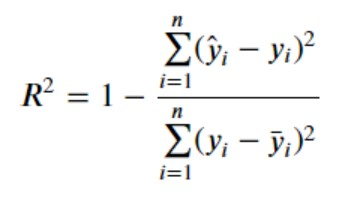

통계학에서 결정계수(決定係數, 영어: coefficient of determination)는 추정한 선형 모형이 주어진 자료에 적합한 정도를 재는 척도이다. 반응 변수의 변동량 중에서 적용한 모형으로 설명가능한 부분의 비율을 가리킨다 \\
(https://ko.wikipedia.org/wiki/%EA%B2%B0%EC%A0%95%EA%B3%84%EC%88%98)

#### Simple Polynomial Regression

In [12]:
import operator
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

In [13]:
# polynomial transformation
polynomial_features= PolynomialFeatures(degree=2, include_bias=True)
X_poly = polynomial_features.fit_transform(X_re)

In [14]:
X_poly

array([[  1.    ,   4.98  ,  24.8004],
       [  1.    ,   9.14  ,  83.5396],
       [  1.    ,   4.03  ,  16.2409],
       [  1.    ,   2.94  ,   8.6436],
       [  1.    ,   5.33  ,  28.4089],
       [  1.    ,   5.21  ,  27.1441],
       [  1.    ,  12.43  , 154.5049],
       [  1.    ,  19.15  , 366.7225],
       [  1.    ,  29.93  , 895.8049],
       [  1.    ,  17.1   , 292.41  ],
       [  1.    ,  20.45  , 418.2025],
       [  1.    ,  13.27  , 176.0929],
       [  1.    ,  15.71  , 246.8041],
       [  1.    ,   8.26  ,  68.2276],
       [  1.    ,  10.26  , 105.2676],
       [  1.    ,   8.47  ,  71.7409],
       [  1.    ,   6.58  ,  43.2964],
       [  1.    ,  14.67  , 215.2089],
       [  1.    ,  11.69  , 136.6561],
       [  1.    ,  11.28  , 127.2384],
       [  1.    ,  21.02  , 441.8404],
       [  1.    ,  13.83  , 191.2689],
       [  1.    ,  18.72  , 350.4384],
       [  1.    ,  19.88  , 395.2144],
       [  1.    ,  16.3   , 265.69  ],
       [  1.    ,  16.51 

In [15]:
lin_reg.fit(X_poly, y_re)

y_poly_pred = lin_reg.predict(X_poly)

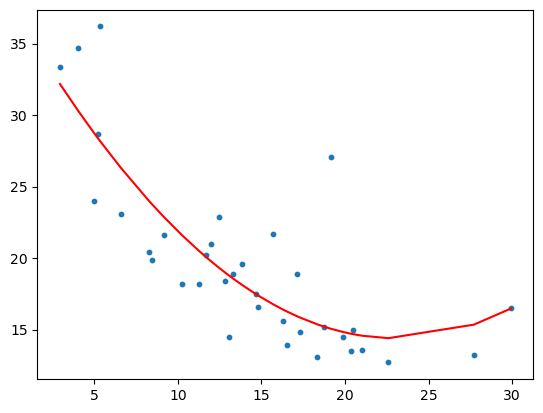

RMSE: 3.7775471605955646
R2 score: 0.6111577631639977


In [16]:
# Plot fit over data:
plt.scatter(X_re, y_re, s=10)
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(X_re, y_poly_pred), key=sort_axis)
X_re_sort, y_poly_pred = zip(*sorted_zip)
plt.plot(X_re_sort, y_poly_pred, color='r')
plt.show()

# Model accuracy
rmse = np.sqrt(mean_squared_error(y_re, y_poly_pred))
r2 = r2_score(y_re, y_poly_pred)
print("RMSE: " + str(rmse))
print("R2 score: " + str(r2))

#### L2 Regularization

선형 모델을 작성해보았으니 regularization term을 추가하여 학습을 진행해보도록 하겠습니다. L2 Regularization term이 추가된 Loss는 다음과 같습니다.

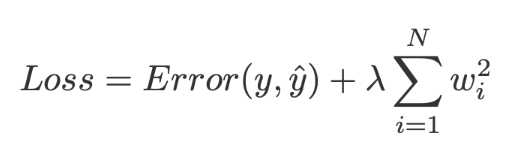

여기서도 마찬가지로 Scikit-learn의 함수를 활용하도록 하겠습니다.

In [17]:
from sklearn.linear_model import Ridge

In [18]:
ridge_reg = Ridge(alpha=1.0)

# fit ridge model
ridge_reg.fit(X_re, y_re)

# predict y
y_ridge_pred = ridge_reg.predict(X_re)

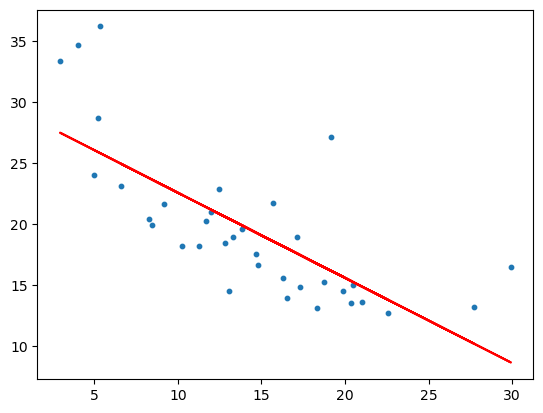

RMSE: 4.1099022048282015
R2 score: 0.5397258138781509


In [19]:
# Plot fit over data
plt.scatter(X_re, y_re, s=10)
plt.plot(X_re, y_ridge_pred, color='r')
plt.show()

# Model accuracy
rmse = np.sqrt(mean_squared_error(y_re, y_ridge_pred))
r2 = r2_score(y_re, y_ridge_pred)
print("RMSE: " + str(rmse))
print("R2 score: " + str(r2))

이번에는 alpha값을 크게 주어 차이를 비교해보겠습니다.

In [20]:
ridge_reg = Ridge(alpha=10000)

# fit ridge model
ridge_reg.fit(X_re, y_re)

# predict y
y_ridge_pred = ridge_reg.predict(X_re)

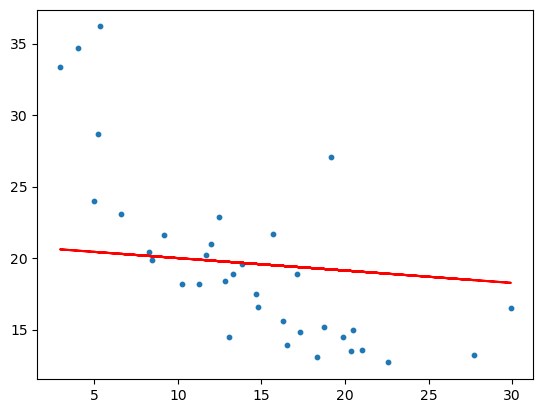

RMSE: 5.664306099570402
R2 score: 0.12572698850601627


In [21]:
# Plot fit over data
plt.scatter(X_re, y_re, s=10)
plt.plot(X_re, y_ridge_pred, color='r')
plt.show()

# Model accuracy
rmse = np.sqrt(mean_squared_error(y_re, y_ridge_pred))
r2 = r2_score(y_re, y_ridge_pred)
print("RMSE: " + str(rmse))
print("R2 score: " + str(r2))

In [22]:
ridge_reg = Ridge(alpha=99999999)

# fit ridge model
ridge_reg.fit(X_re, y_re)

# predict y
y_ridge_pred = ridge_reg.predict(X_re)

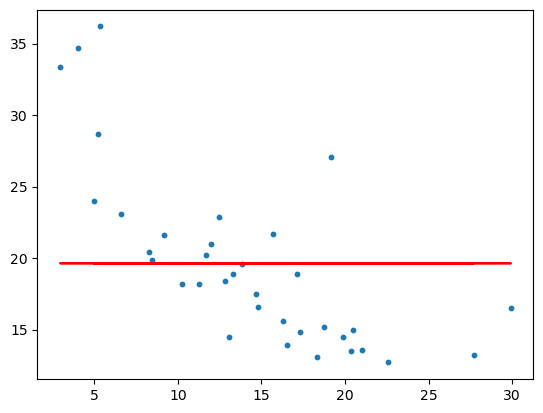

RMSE: 6.0578686853952615
R2 score: 1.5305446138813572e-05


In [23]:
# Plot fit over data
plt.scatter(X_re, y_re, s=10)
plt.plot(X_re, y_ridge_pred, color='r')
plt.show()

# Model accuracy
rmse = np.sqrt(mean_squared_error(y_re, y_ridge_pred))
r2 = r2_score(y_re, y_ridge_pred)
print("RMSE: " + str(rmse))
print("R2 score: " + str(r2))

In [24]:
# polynomial transformation
polynomial_features= PolynomialFeatures(degree=10)
X_poly = polynomial_features.fit_transform(X_re)

#----------

# Model without regularization

lin_reg = LinearRegression()
lin_reg.fit(X_poly, y_re)

y_poly_pred = lin_reg.predict(X_poly)

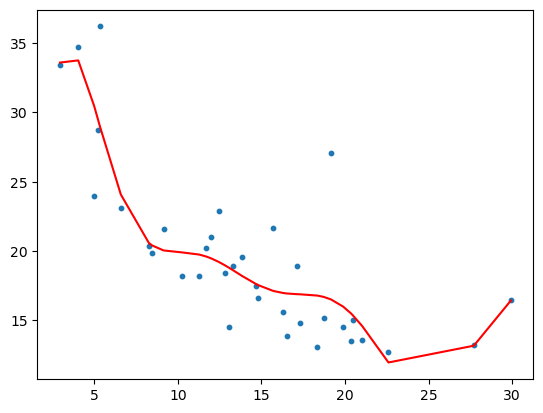

RMSE: 4.010055227422149
R2 score: 0.561818184364141


In [25]:
# Plot fit over data
plt.scatter(X_re, y_re, s=10)
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(X_re, y_poly_pred), key=sort_axis)
X_re_sort, y_poly_pred = zip(*sorted_zip)
plt.plot(X_re_sort, y_poly_pred, color='r')
plt.show()

# Model accuracy
rmse = np.sqrt(mean_squared_error(y_re, y_poly_pred))
r2 = r2_score(y_re, y_poly_pred)
print("RMSE: " + str(rmse))
print("R2 score: " + str(r2))

In [26]:
# define model with alpha=xxx
ridge_reg = Ridge(alpha=10)

# fit ridge model
ridge_reg.fit(X_poly, y_re)

# predict y
y_ridge_poly_pred = ridge_reg.predict(X_poly)

c:\Users\cau\miniconda3\envs\het\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.05473e-29): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


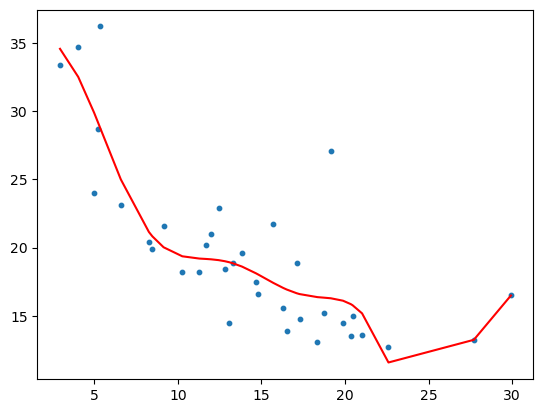

RMSE: 3.918349844691525
R2 score: 0.58163045725463


In [27]:
# Plot fit over data
plt.scatter(X_re, y_re, s=10)
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(X_re, y_ridge_poly_pred), key=sort_axis)
X_re_sort, y_ridge_poly_pred = zip(*sorted_zip)
plt.plot(X_re_sort, y_ridge_poly_pred, color='r')
plt.show()

# Model accuracy
rmse = np.sqrt(mean_squared_error(y_re, y_ridge_poly_pred))
r2 = r2_score(y_re, y_ridge_poly_pred)
print("RMSE: " + str(rmse))
print("R2 score: " + str(r2))

#### L1 Regularization

L2 Regularization term 모델을 작성해보았으니 이번에는 L1 regularization term을 추가하여 학습을 진행해보도록 하겠습니다. L1 Regularization term이 추가된 Loss는 다음과 같습니다.

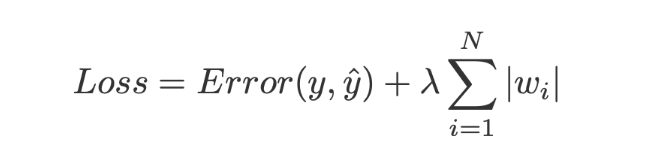

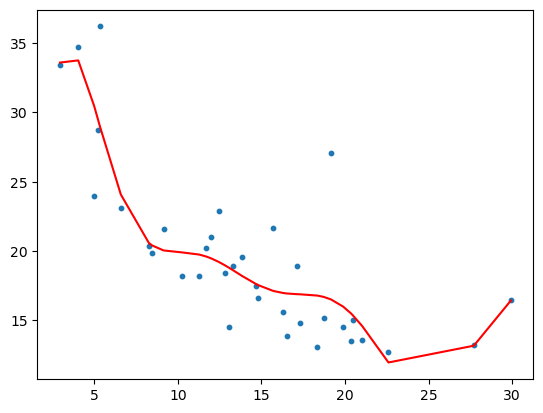

RMSE: 4.010055227422149
R2 score: 0.561818184364141


In [28]:
# polynomial transformation
polynomial_features= PolynomialFeatures(degree=10)
X_poly = polynomial_features.fit_transform(X_re)

#----------

# Model without regularization

lin_reg = LinearRegression()
lin_reg.fit(X_poly, y_re)

y_poly_pred = lin_reg.predict(X_poly)

# Plot fit over data
plt.scatter(X_re, y_re, s=10)
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(X_re, y_poly_pred), key=sort_axis)
X_re_sort, y_poly_pred = zip(*sorted_zip)
plt.plot(X_re_sort, y_poly_pred, color='r')
plt.show()

# Model accuracy
rmse = np.sqrt(mean_squared_error(y_re, y_poly_pred))
r2 = r2_score(y_re, y_poly_pred)
print("RMSE: " + str(rmse))
print("R2 score: " + str(r2))

c:\Users\cau\miniconda3\envs\het\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.662e+02, tolerance: 1.284e-01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


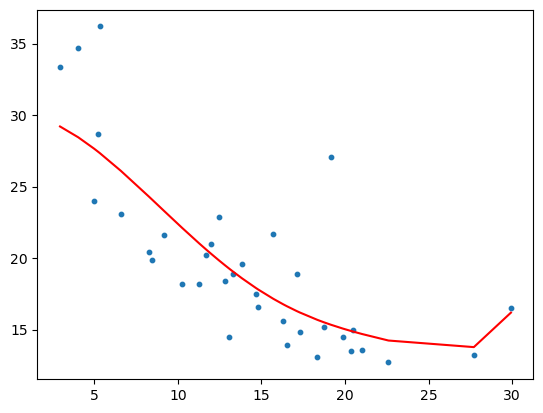

RMSE: 3.6695733053250184
R2 score: 0.633068684029401


In [29]:
# Polynomial regression as before but using Lasso regularization

from sklearn.linear_model import Lasso

# define model with alpha=10
lasso_reg = Lasso(alpha=10)

# fit ridge model
lasso_reg.fit(X_poly, y_re)

# predict y
y_lasso_poly_pred = lasso_reg.predict(X_poly)

# Plot fit over data
plt.scatter(X_re, y_re, s=10)
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(X_re, y_lasso_poly_pred), key=sort_axis)
X_re_sort, y_lasso_poly_pred = zip(*sorted_zip)
plt.plot(X_re_sort, y_lasso_poly_pred, color='r')
plt.show()

# Model accuracy
rmse = np.sqrt(mean_squared_error(y_re, y_lasso_poly_pred))
r2 = r2_score(y_re, y_lasso_poly_pred)
print("RMSE: " + str(rmse))
print("R2 score: " + str(r2))

L2 regularization = Ridge
L1 regularization = Lasso

#### Elastic Net

Elastic Net은 L1 regularization term과 L2 regularization term을 함께 사용한 모델을 의미합니다. 하이퍼파라미터 r이 0이면 Lasso Regression과 같으며, r이 1이면 Ridge Regression과 같습니다.

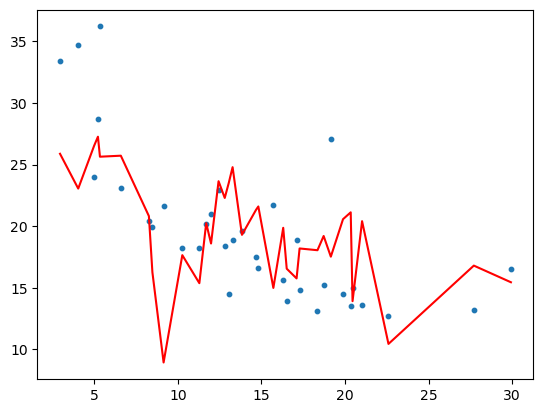

RMSE: 4.11201562278132
R2 score: 0.5392523223998349


In [30]:
from sklearn.linear_model import ElasticNet

# define elastic net model
elastic_net = ElasticNet(alpha=1, l1_ratio=0.5) # Lasso 50 : 50 Ridge

# fit model
elastic_net.fit(X_re, y_re)

# predict y
y_elas_pred = elastic_net.predict(X_re)

# Plot fit over data
plt.scatter(X_re, y_re, s=10)
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(X_re, y_elas_pred), key=sort_axis)
X_re_sort, y_lasso_poly_pred = zip(*sorted_zip)
plt.plot(X_re_sort, y_elas_pred, color='r')
plt.show()

# Model accuracy
rmse = np.sqrt(mean_squared_error(y_re, y_elas_pred))
r2 = r2_score(y_re, y_elas_pred)
print("RMSE: " + str(rmse))
print("R2 score: " + str(r2))

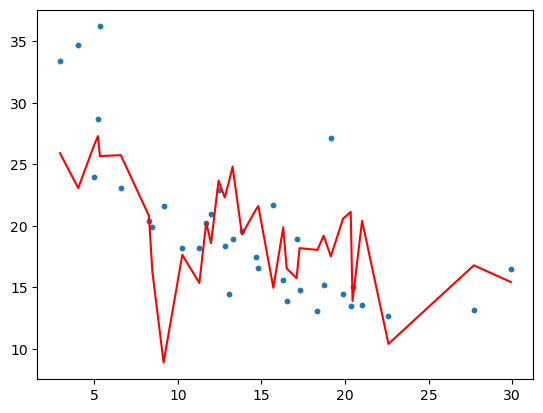

RMSE: 4.111429299795064
R2 score: 0.5393837069660432


In [31]:
# define elastic net model
elastic_net = ElasticNet(alpha=1, l1_ratio=0.1) # Lasso 10 : 90 Ridge

# fit model
elastic_net.fit(X_re, y_re)

# predict y
y_elas_pred = elastic_net.predict(X_re)

# Plot fit over data
plt.scatter(X_re, y_re, s=10)
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(X_re, y_elas_pred), key=sort_axis)
X_re_sort, y_lasso_poly_pred = zip(*sorted_zip)
plt.plot(X_re_sort, y_elas_pred, color='r')
plt.show()

# Model accuracy
rmse = np.sqrt(mean_squared_error(y_re, y_elas_pred))
r2 = r2_score(y_re, y_elas_pred)
print("RMSE: " + str(rmse))
print("R2 score: " + str(r2))

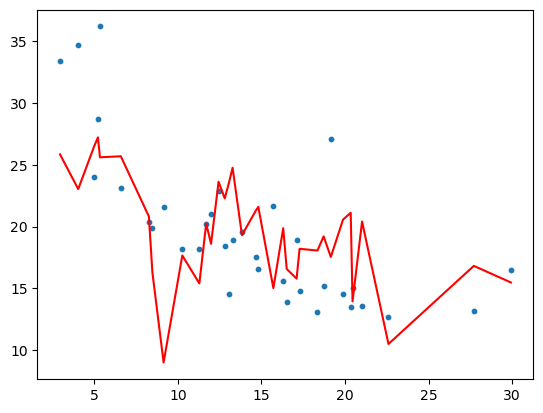

RMSE: 4.112711220994059
R2 score: 0.5390964268982947


In [32]:
# define elastic net model
elastic_net = ElasticNet(alpha=1, l1_ratio=0.9) # Lasso 90 : 10 Ridge

# fit model
elastic_net.fit(X_re, y_re)

# predict y
y_elas_pred = elastic_net.predict(X_re)

# Plot fit over data
plt.scatter(X_re, y_re, s=10)
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(X_re, y_elas_pred), key=sort_axis)
X_re_sort, y_lasso_poly_pred = zip(*sorted_zip)
plt.plot(X_re_sort, y_elas_pred, color='r')
plt.show()

# Model accuracy
rmse = np.sqrt(mean_squared_error(y_re, y_elas_pred))
r2 = r2_score(y_re, y_elas_pred)
print("RMSE: " + str(rmse))
print("R2 score: " + str(r2))

#### Multi-variable Linear Regression with Regularization

아주 간단한 예제에 대해서 각 regularization을 접목해보았습니다. 모델을 단순화시킨다는 것에는 어느정도 감이 오셨을 수 있지만, 실제 활용과 관련해서 어떻게 접목이 되는지 살펴보기 위해 이제는 전체 데이터와 변수를 사용해보도록 하겠습니다.

In [33]:
from IPython.display import display, HTML    

def report_coef(names,coef,intercept):
    r = pd.DataFrame( { 'coef': coef, 'positive': coef>=0  }, index = names )
    r = r.sort_values(by=['coef'])
    display(r)
    print(f"Intercept: {intercept}")
    r['coef'].plot(kind='barh', color=r['positive'].map(
        {True: 'b', False: 'r'}))

In [34]:
import sklearn.datasets

boston = sklearn.datasets.load_boston()
names = list(input_df.columns[:-2])

c:\Users\cau\miniconda3\envs\het\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing d

In [42]:
x = input_df[names].values
y = boston.target

In [43]:
lin_reg = LinearRegression()
lin_reg.fit(x, y)
y_pred = lin_reg.predict(x)

,coef,positive
4,-20.484560,False
7,-1.554912,False
10,-1.014223,False
0,-0.159939,False
6,-0.045932,False
2,-0.027922,False
9,-0.011738,False
11,0.013621,True
1,0.038874,True
8,0.281575,True


Intercept: 20.65262802491502


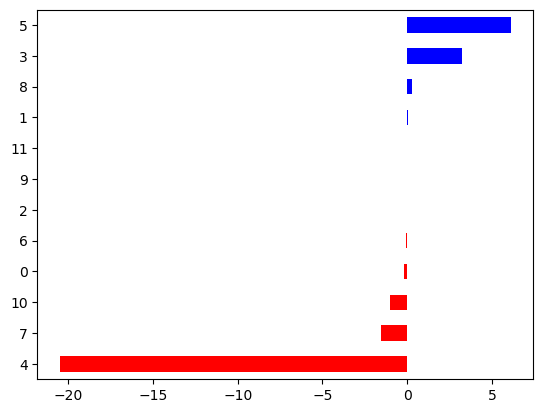

In [44]:
names = list(input_df.columns[:-2])

report_coef(names,lin_reg.coef_,lin_reg.intercept_)

먼저 Regularization 의 의미를 다시 한번 생각해보면, 가중치 w 가 작아지도록 학습한 다는 것은 결국 Local noise 에 영향을 덜 받도록 하겠다는 것이며 이는 Outlier 의 영향을 더 적게 받도록 하겠다는 것입니다.

만약 a = (0.3, -0.3, 0.4) & b = (0.5, -0.5, 0) 이라는 벡터가 있다고 가정해보겠습니다.

해당 벡터에 대해서 L1 Norm과 L2 Norm을 계산하면 다음과 같습니다.

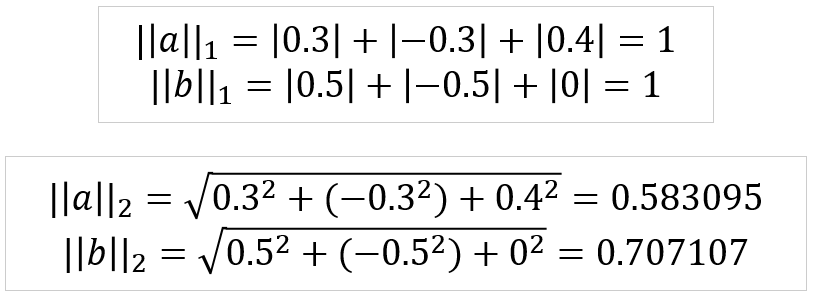

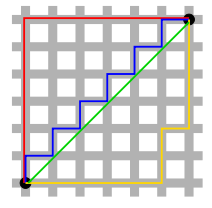

L2 Norm은 각각의 벡터에 대해 항상 Unique한 값을 내지만, L1 Norm은 경우에 따라 특정 Feature (벡터의 요소) 없이도 같은 값을 낼 수 있다는 뜻입니다.

L1 Norm은 파란색 선 대신 빨간색 선을 사용하여 특정 Feature를 0으로 처리하는 것이 가능하다고 이해할 수 있습니다.

,coef,positive
9,-0.018004,False
6,-0.013538,False
0,-0.000000,True
2,-0.000000,True
3,0.000000,True
4,-0.000000,True
5,0.000000,True
7,-0.000000,True
8,0.000000,True
10,-0.000000,True


Intercept: 25.199568338432023


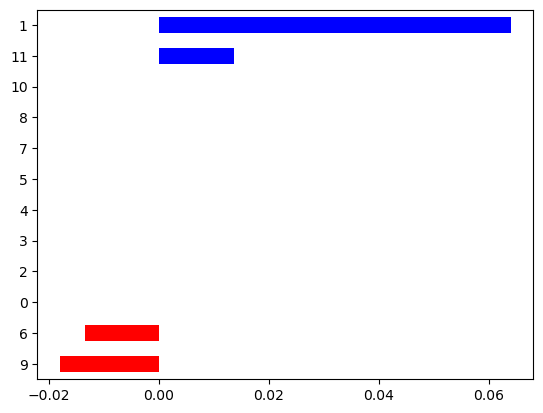

In [45]:
regressor = Lasso(alpha=10)

# Fit/train LASSO
regressor.fit(x,y)
# Predict
y_pred = regressor.predict(x)

report_coef(
  names,
  regressor.coef_,
  regressor.intercept_)

,coef,positive
4,-2.786677,False
7,-1.307236,False
10,-0.845836,False
0,-0.157497,False
2,-0.108733,False
6,-0.062864,False
9,-0.013743,False
11,0.014794,True
1,0.042630,True
8,0.252015,True


Intercept: 9.81036880043802


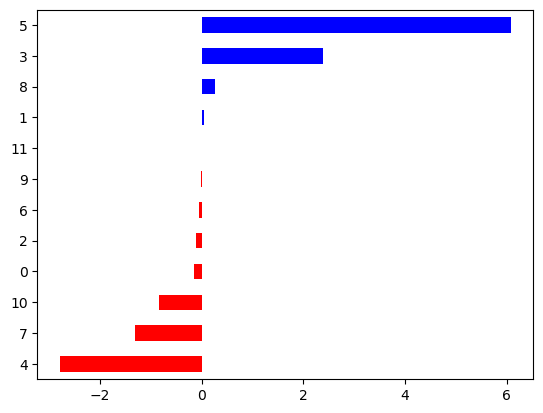

In [46]:
regressor = Ridge(alpha=10)

# Fit/train LASSO
regressor.fit(x,y)
# Predict
y_pred = regressor.predict(x)

report_coef(
  names,
  regressor.coef_,
  regressor.intercept_)